# Exercise 18

## Analyze class homeworks


In [8]:
import pandas as pd
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt

In [60]:
data = pd.read_excel('E18.xlsx')

# Exercise 18.1

Analyze the writing patterns of each student

In [9]:
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [61]:
X = data.drop(['Sexo'], axis=1)
X.head()

,T1,T2,T3,T4,T5,T6
0,Un científico de datos y un ingeniero de datos...,NaN,Los árboles de decisión es uno de los algoritm...,NaN,"En el documento ""Do We Need Hundreds of Classi...",Boosting builds models from individual so call...
1,Aunque los dos perfiles cuentan con habilidade...,Aunque el conceso no es total en el tema de ma...,NaN,En Machine Learing el propósito de los métodos...,El paper publicado en 2014 hace una evaluación...,Gradient Boosting ClassifierGradient Boosting ...
2,Python vs Stata. Analizar información es un pr...,En el marco del Machine Learning encontramos c...,Árbol de clasificación Como su nombre lo indic...,Este es un mecanismo que utiliza varios algori...,El paper analiza 179 clasificadores de 17 dife...,Gradient Boosting Classifier busca aprender de...
3,Los algoritmos de machine learning buscan pred...,Los algoritmos de machine learning buscan pred...,Los arboles de decisión pertenecen a los algor...,Consideremos el siguiente ejemplo: Una persona...,¿Se necesitan cientos de modelos para resolver...,NaN
4,Python vs R para análisis de datos. A pesar de...,Tipos de aprendizaje en Machine Learning. El M...,Tipos de árboles de decisión y aplicaciones. U...,La combinación de modelos o ensemble es un mod...,En el articulo se analizan cerca de 180 clasif...,XGBoosting vs GBoosting. A pesar de que el alg...


In [62]:
X.fillna(' ')

for i in X.index:
    X.loc[i,'texto'] = X.astype(str).loc[i,'T1']+' '+X.astype(str).loc[i,'T2']+' '+X.astype(str).loc[i,'T3']+' '+X.astype(str).loc[i,'T4']+' '+X.astype(str).loc[i,'T5']+' '+X.astype(str).loc[i,'T6']

for i in X.index:
    X.loc[i,'words']=len(X.loc[i,'texto'].split())

X['sentiment'] = X['texto'].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)

#from nltk.corpus import stopwords
stop = stopwords.words('english') 
X['stopwords'] = X['texto'].apply(lambda x: len([x for x in x.split() if x in stop]))

X['perc_stopwords']=X['stopwords']/X['words']

X.drop(['T1','T2','T3','T4','T5','T6'], axis=1, inplace=True)

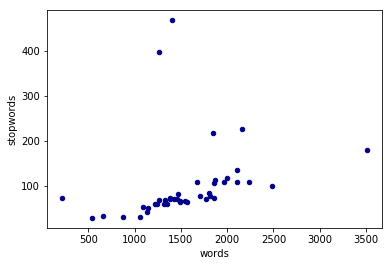

In [68]:
import numpy as np
import matplotlib.pyplot as plt

ax1 = X.plot.scatter(x='words',
                      y='stopwords',
                      c='DarkBlue')

Se puede ver en la gràfica que hay dos estudiantes que registran una gran cantidad de stopwords en sus escritos, lo que indica que utilizan frases màs elaboradas, con mayor cantidad de conectores que el resto de sus compañeros.

### Mendenhall’s Characteristic Curves of Composition

Literary scholar T. C. Mendenhall once wrote that an author’s stylistic signature could be found by counting how often he or she used words of different lengths.

In [61]:
X = data.drop(['Sexo'], axis=1)
X.head()

,T1,T2,T3,T4,T5,T6
0,Un científico de datos y un ingeniero de datos...,NaN,Los árboles de decisión es uno de los algoritm...,NaN,"En el documento ""Do We Need Hundreds of Classi...",Boosting builds models from individual so call...
1,Aunque los dos perfiles cuentan con habilidade...,Aunque el conceso no es total en el tema de ma...,NaN,En Machine Learing el propósito de los métodos...,El paper publicado en 2014 hace una evaluación...,Gradient Boosting ClassifierGradient Boosting ...
2,Python vs Stata. Analizar información es un pr...,En el marco del Machine Learning encontramos c...,Árbol de clasificación Como su nombre lo indic...,Este es un mecanismo que utiliza varios algori...,El paper analiza 179 clasificadores de 17 dife...,Gradient Boosting Classifier busca aprender de...
3,Los algoritmos de machine learning buscan pred...,Los algoritmos de machine learning buscan pred...,Los arboles de decisión pertenecen a los algor...,Consideremos el siguiente ejemplo: Una persona...,¿Se necesitan cientos de modelos para resolver...,NaN
4,Python vs R para análisis de datos. A pesar de...,Tipos de aprendizaje en Machine Learning. El M...,Tipos de árboles de decisión y aplicaciones. U...,La combinación de modelos o ensemble es un mod...,En el articulo se analizan cerca de 180 clasif...,XGBoosting vs GBoosting. A pesar de que el alg...


In [65]:
X.head()

,texto,words,sentiment,stopwords,perc_stopwords
0,Un científico de datos y un ingeniero de datos...,1847.0,-0.002418,217,0.117488
1,Aunque los dos perfiles cuentan con habilidade...,1321.0,-0.007917,60,0.045420
2,Python vs Stata. Analizar información es un pr...,1772.0,-0.094444,71,0.040068
3,Los algoritmos de machine learning buscan pred...,1468.0,-0.312500,82,0.055858
4,Python vs R para análisis de datos. A pesar de...,1670.0,-0.157143,108,0.064671


In [6]:
# Load nltk 
import nltk
%matplotlib inline

In [28]:
# Transform the authors' corpora into lists of word tokens
author_tokens = {}
author_length_distributions = {}

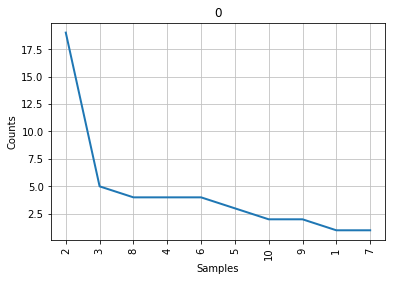

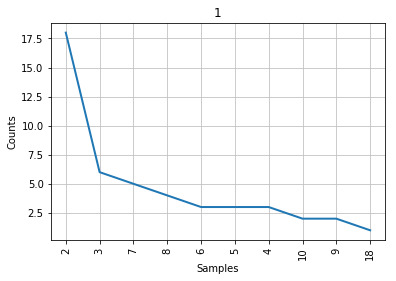

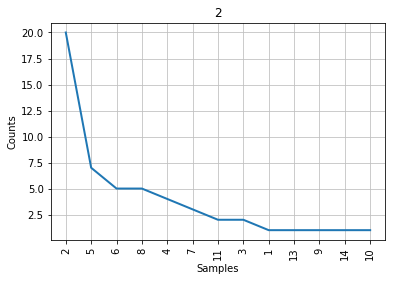

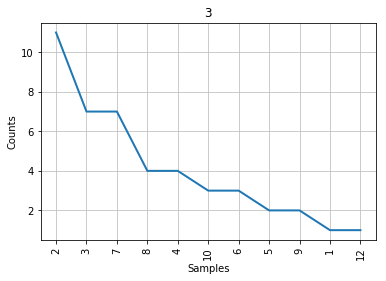

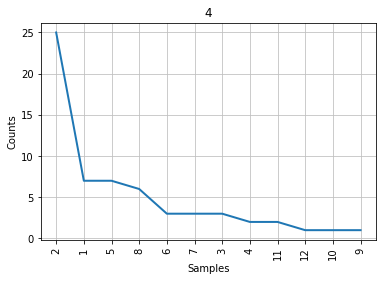

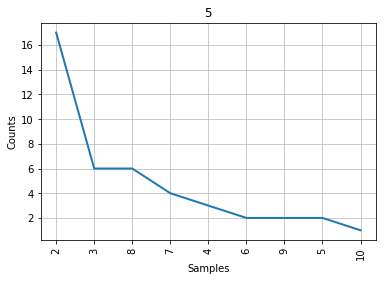

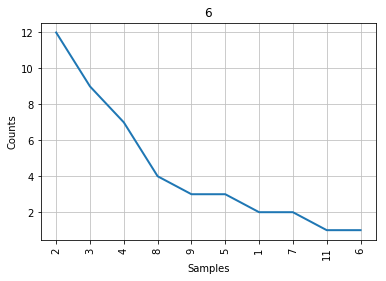

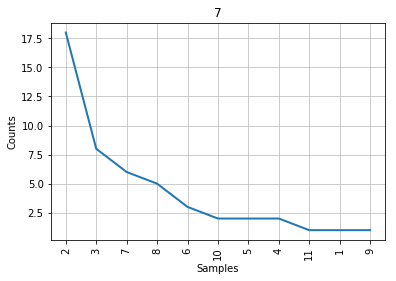

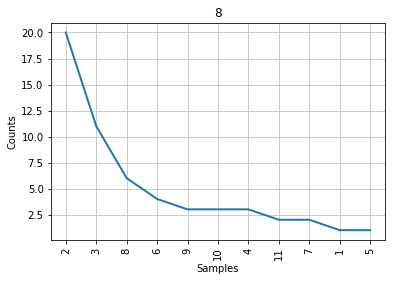

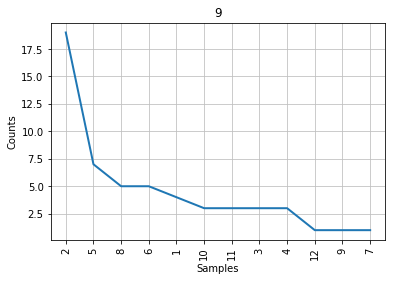

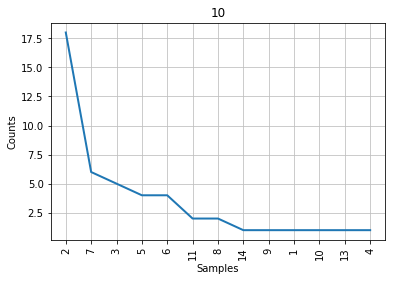

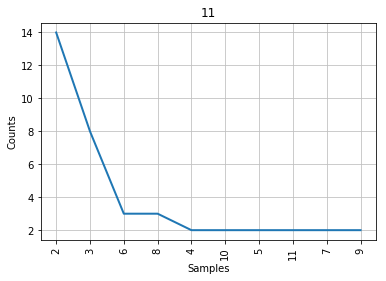

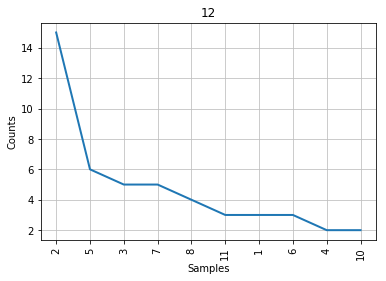

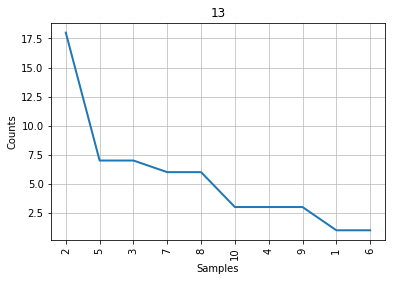

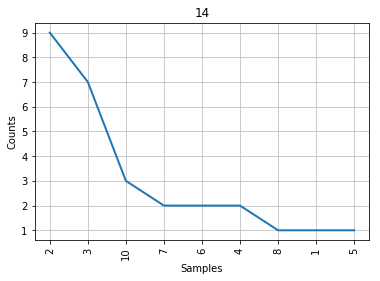

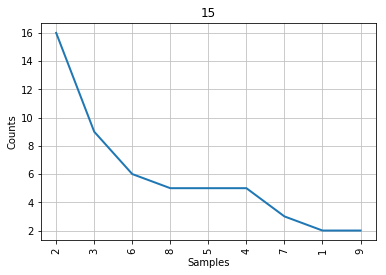

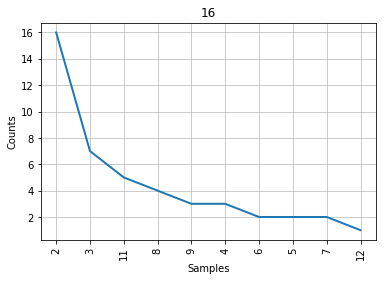

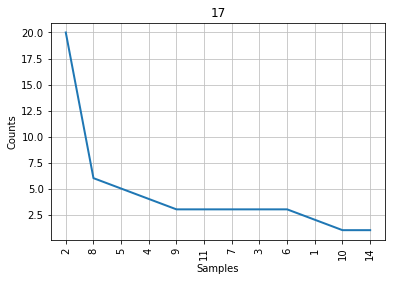

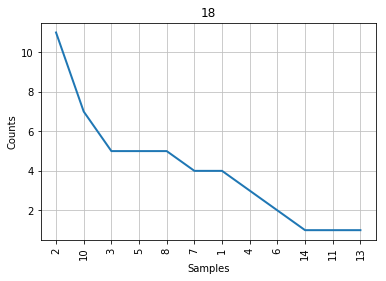

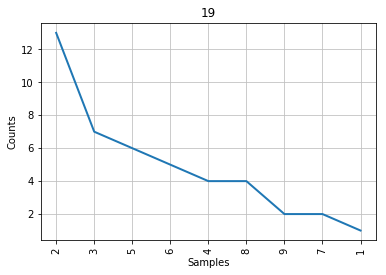

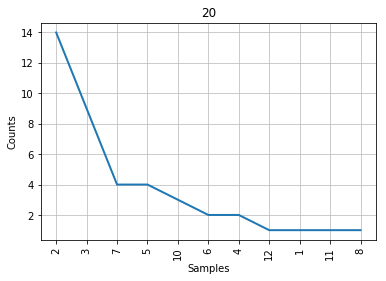

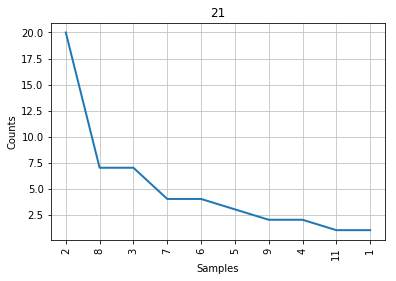

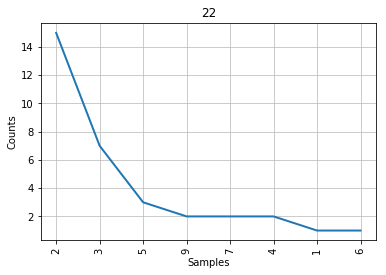

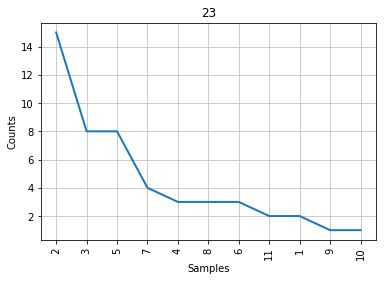

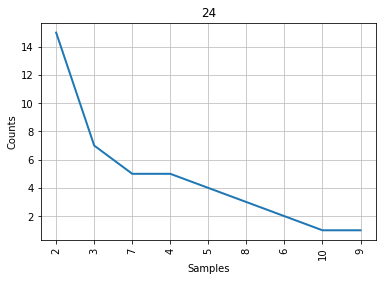

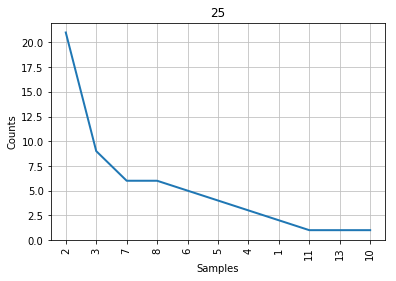

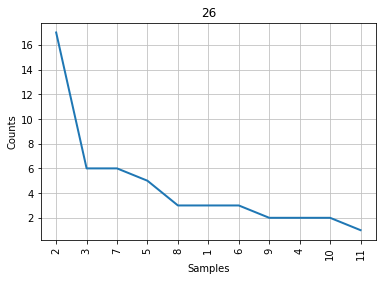

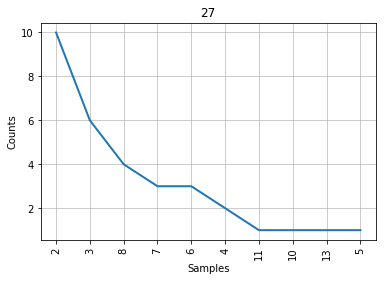

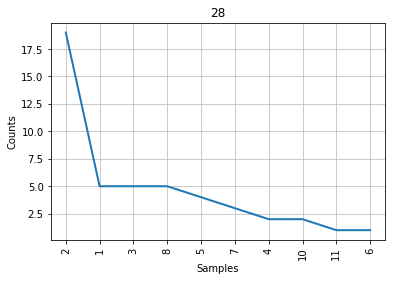

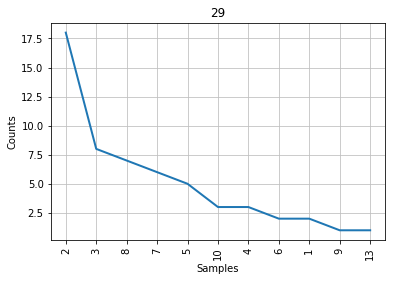

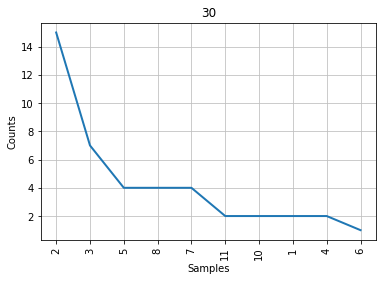

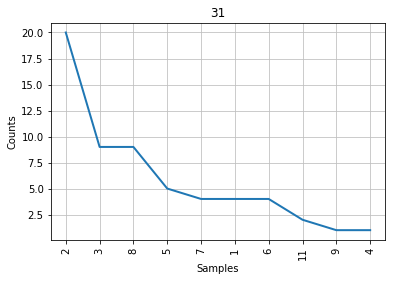

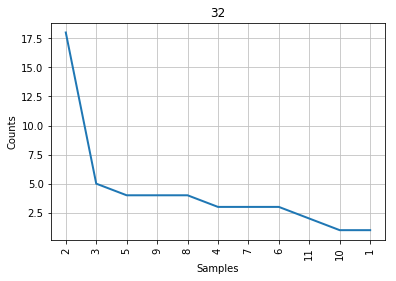

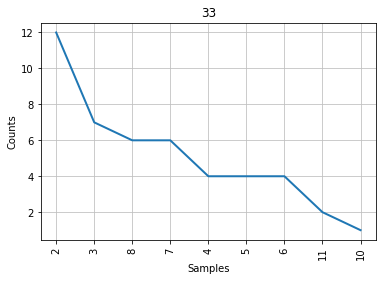

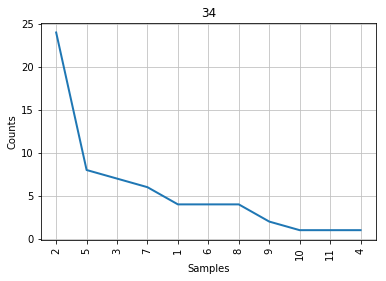

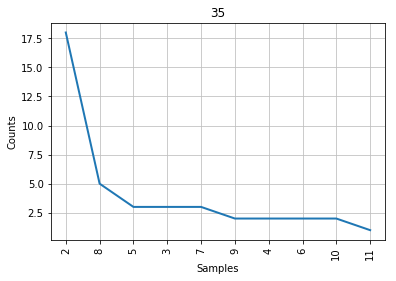

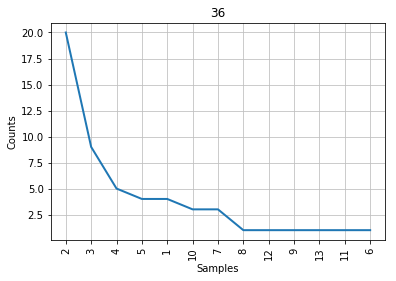

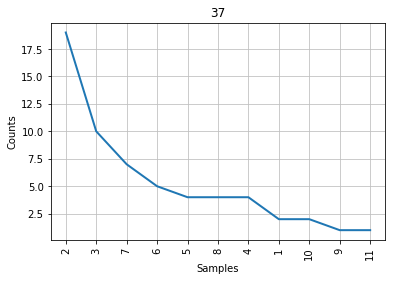

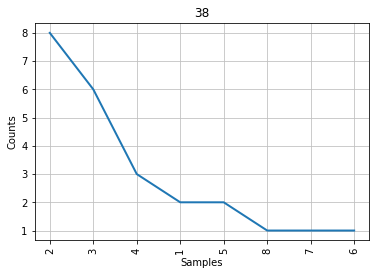

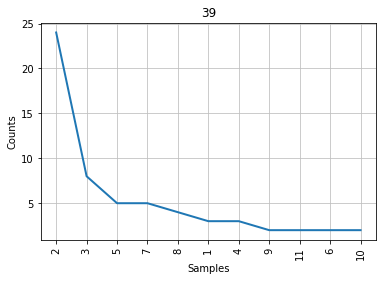

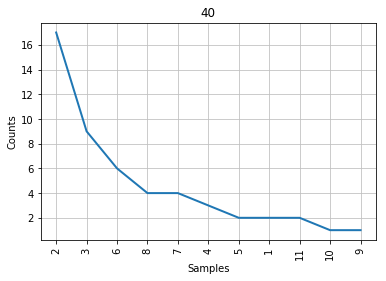

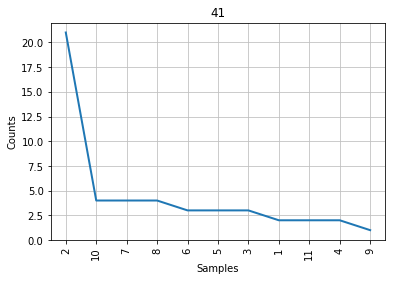

In [29]:
for author in X.columns:
    tokens = nltk.word_tokenize(str(X[author]))
    
    # Filter out punctuation
    author_tokens[author] = ([token for token in tokens if any(c.isalpha() for c in token)])
    
    # Get a distribution of token lengths
    token_lengths = [len(token) for token in author_tokens[author]]
    
    author_length_distributions[author] = nltk.FreqDist(token_lengths)
    author_length_distributions[author].plot(15,title=author) 

# Exercise 18.2

Evaluate the similarities of the homeworks of the students

tip: https://github.com/orsinium/textdistance

### Kilgariff’s Chi-Squared Method

use the statistic to measure the “distance” between the vocabularies employed in two sets of texts. The more similar the vocabularies, the likelier it is that the same author wrote the texts in both sets. This assumes that a person’s vocabulary and word usage patterns are relatively constant.

The smaller the chi-squared value, the more similar the two corpora.

In [30]:
# Lowercase the tokens so that the same word, capitalized or not, counts as one word
for author in X.columns:
    author_tokens[author] = ([token.lower() for token in author_tokens[author]])

In [31]:
len(X.columns)

42

In [32]:
joint_corpus= []

In [33]:
author_chisquared = pd.DataFrame(columns=['Autor', 'Chisquared'])

In [34]:
for author1 in X.columns:
    chisquared = 0
    for author2 in X.columns:
        # First, build a joint corpus and identify the 500 most frequent words in it
        joint_corpus = (author_tokens[author1] + author_tokens[author2])        
        joint_freq_dist = nltk.FreqDist(joint_corpus)
        most_common = list(joint_freq_dist.most_common(500))
        
         # What proportion of the joint corpus is made up of the candidate author's tokens?
        author_share = (len(author_tokens[author])/ len(joint_corpus))
        
        # Now, let's look at the 500 most common words in the candidate author's corpus and compare 
        # the number of times they can be observed to what would be expected if the author's papers 
        # and the Disputed papers were both random samples from the same distribution.
        
        for word,joint_count in most_common:

            # How often do we really see this common word?
            author_count = author_tokens[author1].count(word)
            disputed_count = author_tokens[author2].count(word)

            # How often should we see it?
            expected_author_count = joint_count * author_share
            expected_disputed_count = joint_count * (1-author_share)

            # Add the word's contribution to the chi-squared statistic
            chisquared += ((author_count-expected_author_count) * 
                           (author_count-expected_author_count) / 
                           expected_author_count)

            chisquared += ((disputed_count-expected_disputed_count) *
                           (disputed_count-expected_disputed_count) 
                           / expected_disputed_count)
    
    avg_chisquared = chisquared/len(X.columns) 
    author_chisquared.loc[len(author_chisquared)]=[author1,avg_chisquared] 

In [35]:
author_chisquared.sort_values(by='Chisquared', ascending=False).head()

,Autor,Chisquared
38,38.0,79.351870
14,14.0,70.996141
15,15.0,66.424877
6,6.0,64.316558
31,31.0,63.424939


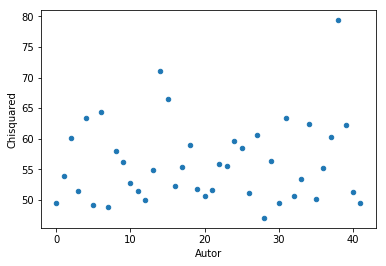

In [36]:
ax1 = author_chisquared.plot.scatter(x='Autor', y='Chisquared')

De la tabla y la gráfica obtenidas se puede deducir que el estudiante número 38 del curso tiene patrones de mayor coincidencia con los textos presentados con el resto de sus compañeros. 

# Exercise 18.3

Create a classifier to predict the sex of each student



In [10]:
dataTraining = pd.read_excel('E18.xlsx')
#dataTraining.drop(['Sexo'], axis=1, inplace=True)
#X.head()

In [11]:
dataTraining.head()

,Sexo,T1,T2,T3,T4,T5,T6
0,H,Un científico de datos y un ingeniero de datos...,NaN,Los árboles de decisión es uno de los algoritm...,NaN,"En el documento ""Do We Need Hundreds of Classi...",Boosting builds models from individual so call...
1,H,Aunque los dos perfiles cuentan con habilidade...,Aunque el conceso no es total en el tema de ma...,NaN,En Machine Learing el propósito de los métodos...,El paper publicado en 2014 hace una evaluación...,Gradient Boosting ClassifierGradient Boosting ...
2,H,Python vs Stata. Analizar información es un pr...,En el marco del Machine Learning encontramos c...,Árbol de clasificación Como su nombre lo indic...,Este es un mecanismo que utiliza varios algori...,El paper analiza 179 clasificadores de 17 dife...,Gradient Boosting Classifier busca aprender de...
3,M,Los algoritmos de machine learning buscan pred...,Los algoritmos de machine learning buscan pred...,Los arboles de decisión pertenecen a los algor...,Consideremos el siguiente ejemplo: Una persona...,¿Se necesitan cientos de modelos para resolver...,NaN
4,H,Python vs R para análisis de datos. A pesar de...,Tipos de aprendizaje en Machine Learning. El M...,Tipos de árboles de decisión y aplicaciones. U...,La combinación de modelos o ensemble es un mod...,En el articulo se analizan cerca de 180 clasif...,XGBoosting vs GBoosting. A pesar de que el alg...


In [12]:
from textblob import TextBlob
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dretrepo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
dataTraining.fillna(' ')

for i in dataTraining.index:
    dataTraining.loc[i,'texto'] = dataTraining.astype(str).loc[i,'T1']+' '+dataTraining.astype(str).loc[i,'T2']+' '+dataTraining.astype(str).loc[i,'T3']+' '+dataTraining.astype(str).loc[i,'T4']+' '+dataTraining.astype(str).loc[i,'T5']+' '+dataTraining.astype(str).loc[i,'T6']

for i in dataTraining.index:
    dataTraining.loc[i,'words']=len(dataTraining.loc[i,'texto'].split())

dataTraining['sentiment'] = dataTraining['texto'].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)

#from nltk.corpus import stopwords
stop = stopwords.words('english') 
dataTraining['stopwords'] = dataTraining['texto'].apply(lambda x: len([x for x in x.split() if x in stop]))

dataTraining['perc_stopwords']=dataTraining['stopwords']/dataTraining['words']

#Longitud del plot en caracteres
dataTraining['plot_length'] = dataTraining['texto'].astype(str).apply(lambda word: sum(len(word) for word in word.split()))

#Longitud promedio de las palabras del plot
dataTraining['word_avg_length'] =dataTraining['plot_length']/dataTraining['words']

#Número de  signos de puntuación por 
import string
count = lambda l1,l2: sum([1 for x in l1 if x in l2])
dataTraining['punctuation'] = dataTraining['texto'].astype(str).apply(lambda s: count(s,set(string.punctuation)))

#conteo de digitos
dataTraining['digits'] = dataTraining['texto'].astype(str).apply(lambda s: count(s,set(string.digits)))

dataTraining.drop(['T1','T2','T3','T4','T5','T6'], axis=1, inplace=True)

In [14]:
dataTraining.head()

,Sexo,texto,words,sentiment,stopwords,perc_stopwords,plot_length,word_avg_length,punctuation,digits
0,H,Un científico de datos y un ingeniero de datos...,1847.0,-0.002418,217,0.117488,9737,5.271792,258,58
1,H,Aunque los dos perfiles cuentan con habilidade...,1321.0,-0.007917,60,0.045420,7194,5.445874,106,24
2,H,Python vs Stata. Analizar información es un pr...,1772.0,-0.094444,71,0.040068,9336,5.268623,177,17
3,M,Los algoritmos de machine learning buscan pred...,1468.0,-0.312500,82,0.055858,8109,5.523842,161,19
4,H,Python vs R para análisis de datos. A pesar de...,1670.0,-0.157143,108,0.064671,8576,5.135329,123,4


In [22]:
X = dataTraining['texto']
X.head()

0    Un científico de datos y un ingeniero de datos...
1    Aunque los dos perfiles cuentan con habilidade...
2    Python vs Stata. Analizar información es un pr...
3    Los algoritmos de machine learning buscan pred...
4    Python vs R para análisis de datos. A pesar de...
Name: texto, dtype: object

In [23]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from scipy.sparse import hstack

In [24]:
vect = CountVectorizer(lowercase=False,ngram_range=(1, 4),max_features=8000, stop_words='english')

X_dtm = vect.fit_transform(X)

In [25]:
features = dataTraining[['words','sentiment','stopwords','perc_stopwords','plot_length','word_avg_length','punctuation','digits']].to_sparse()

In [26]:
X_sparse=hstack((X_dtm, features))

In [27]:
print(X_dtm.shape)
print(features.shape)
print(X_sparse.shape)

(42, 8000)
(42, 8)
(42, 8008)


In [28]:
y = dataTraining['Sexo']

In [56]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

In [57]:
rf = RandomForestClassifier(n_jobs=-1, n_estimators=350, max_depth=70,max_features='auto', random_state=42)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_sparse, y, test_size=0.1, random_state=42)
rf.fit(X_train, y_train)
cross=cross_val_score(rf, X_sparse, y, cv=5, scoring='roc_auc')
print(pd.Series(cross).max())

0.8333333333333334
